### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

The closed form solution can be found by...

Below is the solution using Python.

In [1]:
import math
exponent = 1
for n in range (0,1000):
    exponent = math.sqrt(2)**exponent
print exponent

2.0


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [2]:
import random as rnd
heads = 0

#for n in range (0,1000):
    #coin1 = math.floor(rnd.random()/0.6)
    #heads += coin1
#print heads

def headsOrTails(probTails):
    if rnd.random() < probTails:
        return 0 #tails
    return 1 #heads

firstFlipIsAHeadCtr = 0
secondFlipIsAHeadCtr = 0
for trialCtr in range (0,1000000):
    if rnd.random() < 0.5: #reach into bag, and grab either coin
        probTails = 0.6 #heads 40% of the time
    else:
        probTails = 0.4 #heads 60% of the time
    coin = headsOrTails(probTails) #flip the coin!
    if coin == 1: #it's a head, because it must be 1, not 0:
        firstFlipIsAHeadCtr += 1
        secondFlipIsAHeadCtr += headsOrTails(probTails)
probEstimate = float(secondFlipIsAHeadCtr) / firstFlipIsAHeadCtr
print probEstimate



0.520454972288


###3.1 Object-oriented version

Here we solve the same problem, but introducting objects to Python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potential *classes*. A class is a template, sore of like a cookie cutter for stamping our identical objects, ready for use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into classes.

The *methods* of a class represent the actions we expect of the objects created from the class.


In [3]:
import numpy as np

class Coin(object): #we capitalize the name of classes
    #almost always define a constructor, so that we can
    #create instances (objects) of Coin:
    def __init__(self, probHeads):
        self.probHeads = probHeads
        
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
    def nextNFlipsAreHeads(self,n):
        for i in range(n):
            if not self.flipIsHead(): #i.e. it/s a Tail!
                return False
        return True
    
class CoinBag(object):
    def __init__(self):
        self.coins = []
        
    def addCoin(self, coin):
        self.coins.append(coin)
        
    def pickRandomCoin(self):
        return np.random.choice(self.coins)
        
cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

#print cb.pickRandomCoin()

firstFlipIsAHeadCtr = 0 #count only trials where first flip is  head
secondFlipIsAHeadCtr = 0 #and count how many of those had a 2nd head
for trialCtr in range (0,100):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.flipIsHead(): 
        firstFlipIsAHeadCtr += 1
        if randomCoin.flipIsHead():
            secondFlipIsAHeadCtr += 1
print float(secondFlipIsAHeadCtr) / firstFlipIsAHeadCtr

    
        


0.566037735849


### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [4]:
cb = CoinBag()
cb.addCoin(Coin(1))
#for n in range(999):
    #cb.addCoin(Coin(0.5))
[cb.addCoin(Coin(0.5)) for n in range(999)]
    
useableTrialCtr = 0
fairCoinCtr = 0
for i in range (1000):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10): 
        useableTrialCtr += 1
        if randomCoin.probHeads < 1:
            fairCoinCtr += 1
print fairCoinCtr, useableTrialCtr, float(fairCoinCtr)/useableTrialCtr




5 7 0.714285714286


### Monte Hall Problem

You are a contesttant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?


### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

ImportError: No module named proj06lib

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [27]:
class Spinner(object):
    def __init__(self):
        self.total = 0
        self.spinCounter = 0
        
    def spin(self):
        self.total += np.random.random()
        self.spinCounter += 1
    
    def reset(self):
        self.total = 0
        self.spinCounter = 0
        
    def spinUntilGreaterThanOneAndReset(self):
        while self.total < 1:
            self.spin()
        answer = self.spinCounter
        self.reset()
        return answer
    
spinner = Spinner()
totalSpins = 0
numTrials = 10000
#for n in range(numTrials):
    #totalSpins += spinner.spinUntilGreaterThanOneAndReset()
#print float(totalSpins)/numTrials
trials = [spinner.spinUntilGreaterThanOneAndReset()for n in range (numTrials)]
print float(sum(trials))/numTrials

#print trials

            
        

2.72


Populating the interactive namespace from numpy and matplotlib


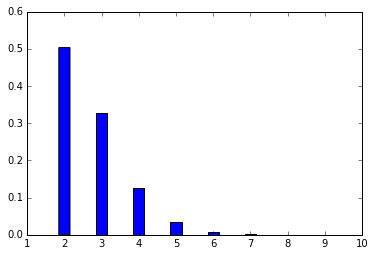

In [28]:
#need next line to get figure to appear in jupyter
%pylab inline 
import matplotlib.pyplot as plt
numBins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins=numBins, normed=True, align='left', rwidth=0.3, range=(2, 2+numBins))
plot.grid = True

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?